<a href="https://colab.research.google.com/github/sayantan16/Deep-Learning-Sample-Images/blob/main/04_Transfer_Learning_Tensorflow_Part_1_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with Tensorflow - Part 1: Feature Extracttion

Transfer Learning - leveraging a existing model's architecture and use its learned pattern on an use case

## Imports and Functions

In [1]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Create Model Function

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

# Create model function to create a model from hub URL

Image_Shape = (224, 224)

def create_model(model_url, num_classes=10):
  """
  Takes a Tensorflow Hub URL and create a keras Sequential model with it.

  Args:
    model_url (str): A Tensorflow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer, should be equal to the number of target classes, default=10

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor layer and Dense output layer with num_classes output neurons.
  """

  # Download the pre trained model and save it as a keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,  # Freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape=Image_Shape + (3,))

  # Create the Sequential Model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model;

Plotting Loss Curve Function

In [3]:
# Plotting the Loss Curves of a model

import matplotlib.pyplot as plt

# Plot the validation and training curves

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

## Setting up callbacks (process that runs while the model trains)

Extra functionality to perform during or after training. Some very popular callback functions are:

1. Tracking experiments with Tensorboard callback
2. Model Checkpointing with ModelCheckpoint callback
3. Stopping a model from training (before it trains too long and overfits) with the EarlyStopping callback.

In [4]:
# Create Tensorboard callback
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  # tensorboard_callback = tf.keras.callbacks.Tensorboard(log_dir=log_dir)
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorboard log files to: {log_dir }")
  return tensorboard_callback

## Downloading the data

In [5]:
import zipfile

# Download the data from google storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Extract the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-18 00:10:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   191MB/s    in 0.8s    

2023-08-18 00:10:11 (191 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



## Number of images in each folder

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

## Create the data loaders (prepare the data)

Using the ImageDataGenerator to use loading and creating batches of the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data inputs

Image_Shape = (224, 224)
Batch_Size = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Images: ")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=Image_Shape,
                                                          batch_size=Batch_Size,
                                                          class_mode="categorical")

print("Testing Images: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=Image_Shape,
                                             batch_size=Batch_Size,
                                             class_mode="categorical")

Training Images: 
Found 750 images belonging to 10 classes.
Testing Images: 
Found 2500 images belonging to 10 classes.


## Creating Models using Tensorflow Hub

Accessing pre trained models from https://tfhub.dev/

Using the following model for image classification:
https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [8]:
# Comparing 2 models:

res_net_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficient_net_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

### Creating and Testing ResNet TensorFlow Hub Feature Extraction Model

In [9]:
# Create ResNet Model

resnet_model = create_model(res_net_url,
                            num_classes=train_data_10_percent.num_classes)

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [11]:
# Compile the ResNet Model

resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [12]:
# Fit our ResNet model to the data (10 percent of 10 classes)

resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2")])

Saving tensorboard log files to: tensorflow_hub/resnet50V2/20230818-001023
Epoch 1/5
24/24 [==============================] - 26s 547ms/step - loss: 2.0338 - accuracy: 0.3253 - val_loss: 1.2675 - val_accuracy: 0.5800
Epoch 2/5
24/24 [==============================] - 12s 512ms/step - loss: 0.9245 - accuracy: 0.7267 - val_loss: 0.8677 - val_accuracy: 0.7336
Epoch 3/5
24/24 [==============================] - 12s 501ms/step - loss: 0.6209 - accuracy: 0.8240 - val_loss: 0.7704 - val_accuracy: 0.7556
Epoch 4/5
24/24 [==============================] - 13s 542ms/step - loss: 0.4790 - accuracy: 0.8640 - val_loss: 0.7182 - val_accuracy: 0.7688
Epoch 5/5
24/24 [==============================] - 10s 434ms/step - loss: 0.3840 - accuracy: 0.9133 - val_loss: 0.6910 - val_accuracy: 0.7748


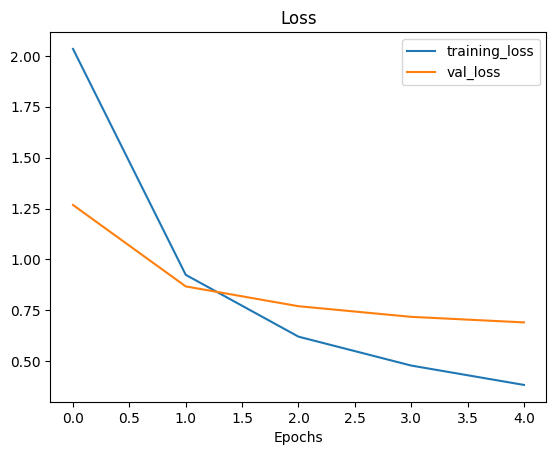

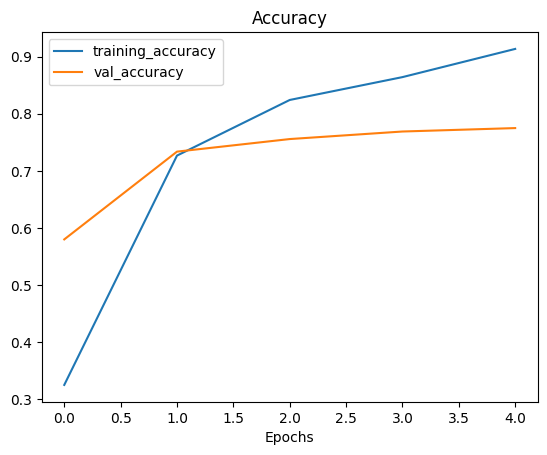

In [13]:
# Plot loss curve for ResNet model hsitory

plot_loss_curves(history=resnet_history)

### Creating and Testing EfficientNet TensorFlow Hub Feature Extraction Model

In [14]:
# Create EfficientNet Model

efficientnet_model = create_model(efficient_net_url,
                            num_classes=train_data_10_percent.num_classes)

In [15]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [16]:
# Compile the EfficientNet Model

efficientnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [17]:
# Fit our EfficientNet model to the data (10 percent of 10 classes)

efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="efficientnetb0")])

Saving tensorboard log files to: tensorflow_hub/efficientnetb0/20230818-001153
Epoch 1/5
24/24 [==============================] - 23s 505ms/step - loss: 1.8274 - accuracy: 0.4587 - val_loss: 1.2794 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 10s 417ms/step - loss: 1.0501 - accuracy: 0.7840 - val_loss: 0.8474 - val_accuracy: 0.8272
Epoch 3/5
24/24 [==============================] - 10s 407ms/step - loss: 0.7490 - accuracy: 0.8307 - val_loss: 0.6842 - val_accuracy: 0.8524
Epoch 4/5
24/24 [==============================] - 9s 400ms/step - loss: 0.6003 - accuracy: 0.8627 - val_loss: 0.6031 - val_accuracy: 0.8572
Epoch 5/5
24/24 [==============================] - 9s 381ms/step - loss: 0.5093 - accuracy: 0.8867 - val_loss: 0.5485 - val_accuracy: 0.8684


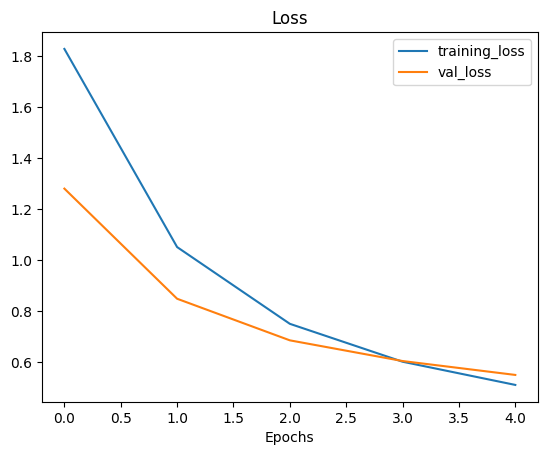

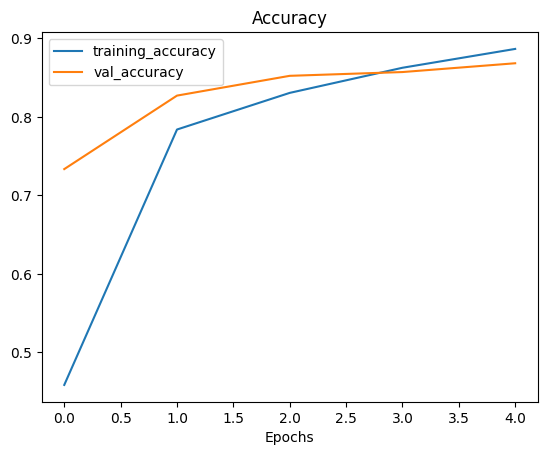

In [18]:
# Plot loss curve for EfficientNet model hsitory

plot_loss_curves(history=efficientnet_history)

## Different Types of Transfer Learning

1. **"As is"** transfer learning - using an existing model with no changes whatsoever (eg using ImageNet model on 1000 ImageNet classes, none of our own).

2. **"Feature Extraction"** transfer learning - use the preferred patterns of an existing model (eg - efficientnetB0 trained on ImageNet) and adjust the output layer for your own problem (eg - 1000 classes -> 10 classes of food).

3. **"Fine Tuning"** transfer learnning - use the existing prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers).

# Comparing our Model Results using TensorBoard

In [19]:
# Upload TensorBoard dev records

!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. Resnet50V2" \
  --description "Comparing 2 different TF Hub Feature extraction model architectures using 10% of the training data" \
  --one_shot

2023-08-18 00:13:04.241195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   NZBY-DBXD

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, 

In [20]:
# Check the TensorBoard Experiments

!tensorboard dev list

2023-08-18 00:15:40.028194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.10/dist-packa

In [21]:
# Delete an experiment

# !tensorboard dev delete --experiment_id NA5NIqv6Q2aW1gpaAOpQXg